# ML Laboratory 02: Logistic Regression

# 1. Objective

Students should understand and be able use a logistic regression model
in Matlab

# 2. Theoretical aspects

Logistic regression is a widely used model for estimating probabilities
(e.g. values between 0 and 1). It is also widely used for **binary
classification**.

## 2.1 Logistic regression: the model

We have an input vector $x$ and a target value $y$:
$$X = \begin{bmatrix} x_1 & x_2 & \dots & x_N \end{bmatrix} \rightarrow y$$

The output $y$ is assumed to be the **sigmoid function** $\sigma(z)$
(also known as the **logistic function**, hence the name):

$$y \approx \sigma(z) = \frac{1}{1 + e^{-z}}$$

applied to a **linear combination** $z$ of the inputs $X$:

$$z = w_1 x_1 + w_2 x_2 + ... + w_N x_N + b$$

Put together in a single equation:

$$y \approx \frac{1}{1 + e^{- w_1 x_1 - w_2 x_2 - ... - w_N x_N - b}}.$$

Or, as a **sequence of two steps**:

1.  Compute a **linear combination $z$** of the inputs:
    $$z = w_1 x_1 + w_2 x_2 + ... + w_N x_N + b$$

2.  Pass $z$ through the **sigmoid** function $\sigma(z)$:
    $$y = \frac{1}{1 + e^{-z}}$$

<figure>
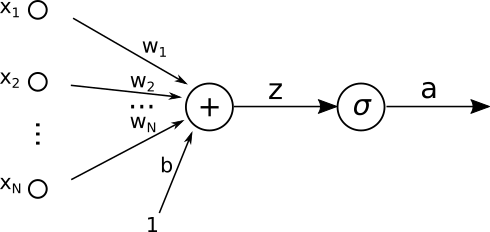
<figcaption aria-hidden="true">Logistic regression as 1
neuron</figcaption>
</figure>

Both steps can be represented as one “neuron” like this:

<figure>
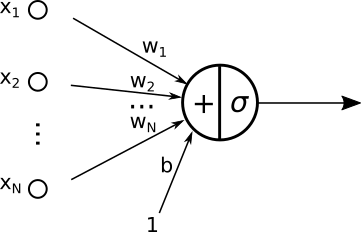
<figcaption aria-hidden="true">Logistic regression as 1
neuron</figcaption>
</figure>

## 2.2 The sigmoid function

Let’s take a look at the sigmoid function $\sigma(z)$:

<figure>
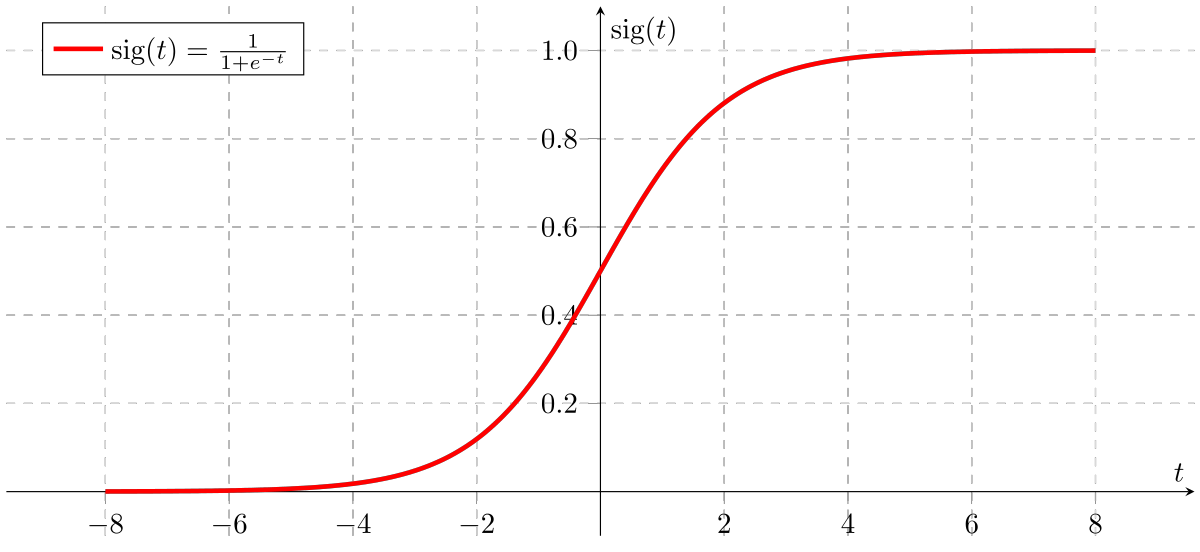
<figcaption aria-hidden="true">The sigmoid function</figcaption>
</figure>

Note that:

-   The output value $\sigma(z), \forall z$ is always between 0 and 1.
    This makes the result good for modeling **probabilities**, but not
    good for other types of numeric values.

-   The effect of the sigmoid can be understood as follows:

    -   when $z$ is much bigger than 0, the result is practically 1
    -   when $z$ is much smaller than 0, the result is practically 0
    -   when $z$ is around 0, there is a transition zone from 0 to 1. In
        particular, when $z=0$, the output is right at the middle,
        $\sigma(0) = 0.5$.

This makes it similar to classification, with $z=0$ being the frontier
between the two classes:

-   if $z$ much larger than 0, data belongs almost surely to class 1;
-   if $z$ much smaller than 0, data belongs almost surely to class 0;
-   $z=0$ is the frontier. Around the frontier, we have less confidence
    in the classification (a sort of “gray area”).

## 2.3 Logistic regression: the parameters

The parameters of the logistic regression model are similar to those of
linear regression:

-   the **weights** $w_1, w_2, ... w_N$, and
-   the **bias** value $b$ (also known as the **intercept**).

In a similar way to linear regression, we can consider $b$ as just
another weight $w_i$ which multiplies a constant input of 1. In this
way, we can compute $z$ as the inner product of two vectors:

$$z = w_1 x_1 + w_2 x_2 + ... + w_N x_N + b = \begin{bmatrix} x_1 & x_2 & \dots & x_N & 1 \end{bmatrix} \cdot \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_N \\ b \end{bmatrix}$$

## 2.4 Cost function (loss function)

In general, any cost function can be chosen for any model.

However, in this case, because the outputs are typically understood as
**probabilities**, we should use a distance function which is
appropriate to probabilities: the cross-entropy (also known as the
Kullback-Leibler distance).

Given the correct value is $y$ and the predicted value $\hat{y}$, the
**cross-entropy** loss (cost) function, also known as the
**Kullback-Leibler (KL) distance** is defined as:

$$L(y, \hat{y}) = - y \log{\hat{y}} - (1-y) \log{(1 - \hat{y})}$$

Usually, the true value $y$ is either 0 or 1 (e.g. in a classification:
0 = cat, 1 = dog). In this case the cross-entropy can be written as:

$$L(y, \hat{y}) =
\begin{cases}
- \log(\hat{y})     = \log{\frac{1}{\hat{y}}}, & \textrm{ when true output is } y = 1; \\
- \log(1 - \hat{y}) = \log{\frac{1}{1-\hat{y}}}, & \textrm{ when true output is } y = 0;
\end{cases}
$$

In both cases, the cost is 0 if $\hat{y} = y$, and it is $\infty$ when
$\hat{y}$ is exactly the opposite, as depicted below:

<figure>
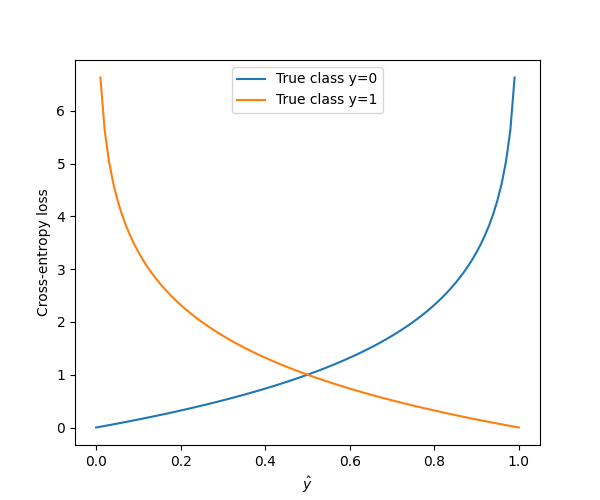
<figcaption aria-hidden="true">Cross-entropy loss when true class <span
class="math inline"><em>y</em></span> is either 0 or 1</figcaption>
</figure>

When there are M input-output pairs $(X, y)$, the cost is the average
for all of them:

$$J = \frac{1}{M} \sum_i L(y^i, \hat{y}^i) = \frac{1}{M} \sum_i \left(- y \log{\hat{y}} - (1-y) \log{1 - \hat{y}} \right)$$

## 2.5 How to train logistic regression?

**Training** = **learning** = finding good values for the unknown
parameters.

There is no closed-form solution. The solution is found using numerical
algorithms.

### Gradient Descent

We can use the same Gradient Descent approach to train the parameters of
the model.

-   Initialize parameter vector $W$ with random values
-   Repeat:
    -   Compute cost $J$ (forward pass)
    -   Compute the gradient with vector of $J$ with respect to
        parameters $W$, $\frac{dJ}{dW}$
    -   Update parameters: $W = W - \mu \frac{dJ}{dW}$

For the logistic regresion with the cross-entropy loss, the gradient is
equal to:

$$\frac{dJ}{dW} = X^* (\hat{Y} - Y).$$

(TODO: prove this).

That’s right, the gradient of logistic regression with cross-entropy
loss is the same as the gradient of linear regression with quadratic
loss.

# 3. Logistic Regression in Matlab

## 3.1 Direct implementation example

Below is an example of logistic regression in 2D (there are 2 inputs
$[x_1, x_2]$), trained with Gradient Descent.

We have two classes of points:

-   one set of points around (0,0)
-   another set of points around (2,2)

We want to find the separating line between the two classes.

Each data point has two values $(x_1, x_2)$. Since we have two inputs,
there will be 3 parameters in the $W$ vector (including $b$).

**Note**: for a nice graphical animation, please run the code below
**directly in Matlab** (file `L2_LogisticRegression_Visualize2D.m`).

``` matlab
clear all
close all

% Load some data
%load('LogisticReg.mat');  % the inputs are X, the outputs are Y
% Generate two clusters of points:
% - one set of points around the point (0,0)
% - second one around the point (2,2)
% - spread of points is 0.5
% - 300 points in each class
[X, Y] = make_data([0,0], [2,2], 0.5, 300)

% Extend X with a column of 1
N = size(X,1);
X = [X, ones(N,1)];

% Initialize the three parameters in W
W = randn(3,1);

% Repeat Gradient Descent iterations
for iter=1:1000
    % Predict
    z = X * W;
    y_pred = 1./(1 + exp(-z));

    % Cost function
    J(iter) = 1/N * sum(-Y .* log(y_pred) - (1-Y).* log(1-y_pred));

    % Compute gradient (derivatives)
    dW = X' * (y_pred - Y);

    % Update
    mu = 0.0001;          % step-size
    W = W - mu*dW;        % update rule

    %===================================
    % Plotting stuff
    %===================================

    % Plot decision boundary
    subplot(1,2,1)
    gscatter(X(:,1),X(:,2),Y)
    title('Data plot');
    hold on

    % Plot decision line on top of points
    xx = linspace(-2, 3, 1000);
    yy = -W(1)/W(2) * xx - W(3)/W(2);
    hold on
    plot(xx, yy, 'LineWidth',2);
    legend('Class 0', 'Class 1', 'Boundary between classes (output = 0.5)');
    hold off
    axis([-2, 3, -2, 3])
    axis square

    % On right side, plot grayscale regions
    subplot(1,2,2)
    I = zeros(500,500);
    x_values = linspace(-2, 3, 500);
    y_values = linspace(-2, 3, 500);
    for i = 1:length(x_values)
        x = x_values(i);
        for j = 1:length(y_values)
            y = y_values(j);
            % Compute prediction in point (i,j)
            z = [x, y, 1] * W;
            I(501-i,j) = 1 / (1 + exp(-z));   % 0 = black,  1 = white, in-between = gray
        end
    end
    I = fliplr(flipud(I'));
    imshow(I);
    title('Sigmoid output');
    hold on

    % Plot line on right side as well
    subplot(1,2,2)
    xx_rescaled = (xx + 2)*500/5+1;
    yy_rescaled = 500 - (yy + 2)*500/5+1;
    %plot(xx_rescaled, yy_rescaled, 'LineWidth',2)
    plot(xx_rescaled, yy_rescaled, 'LineWidth',2)
    hold off
    %axis([-2, 3, -2, 3])
    axis square

    drawnow()

    %pause(0.1)
    %===================================
end
```

### Expected output

<figure>
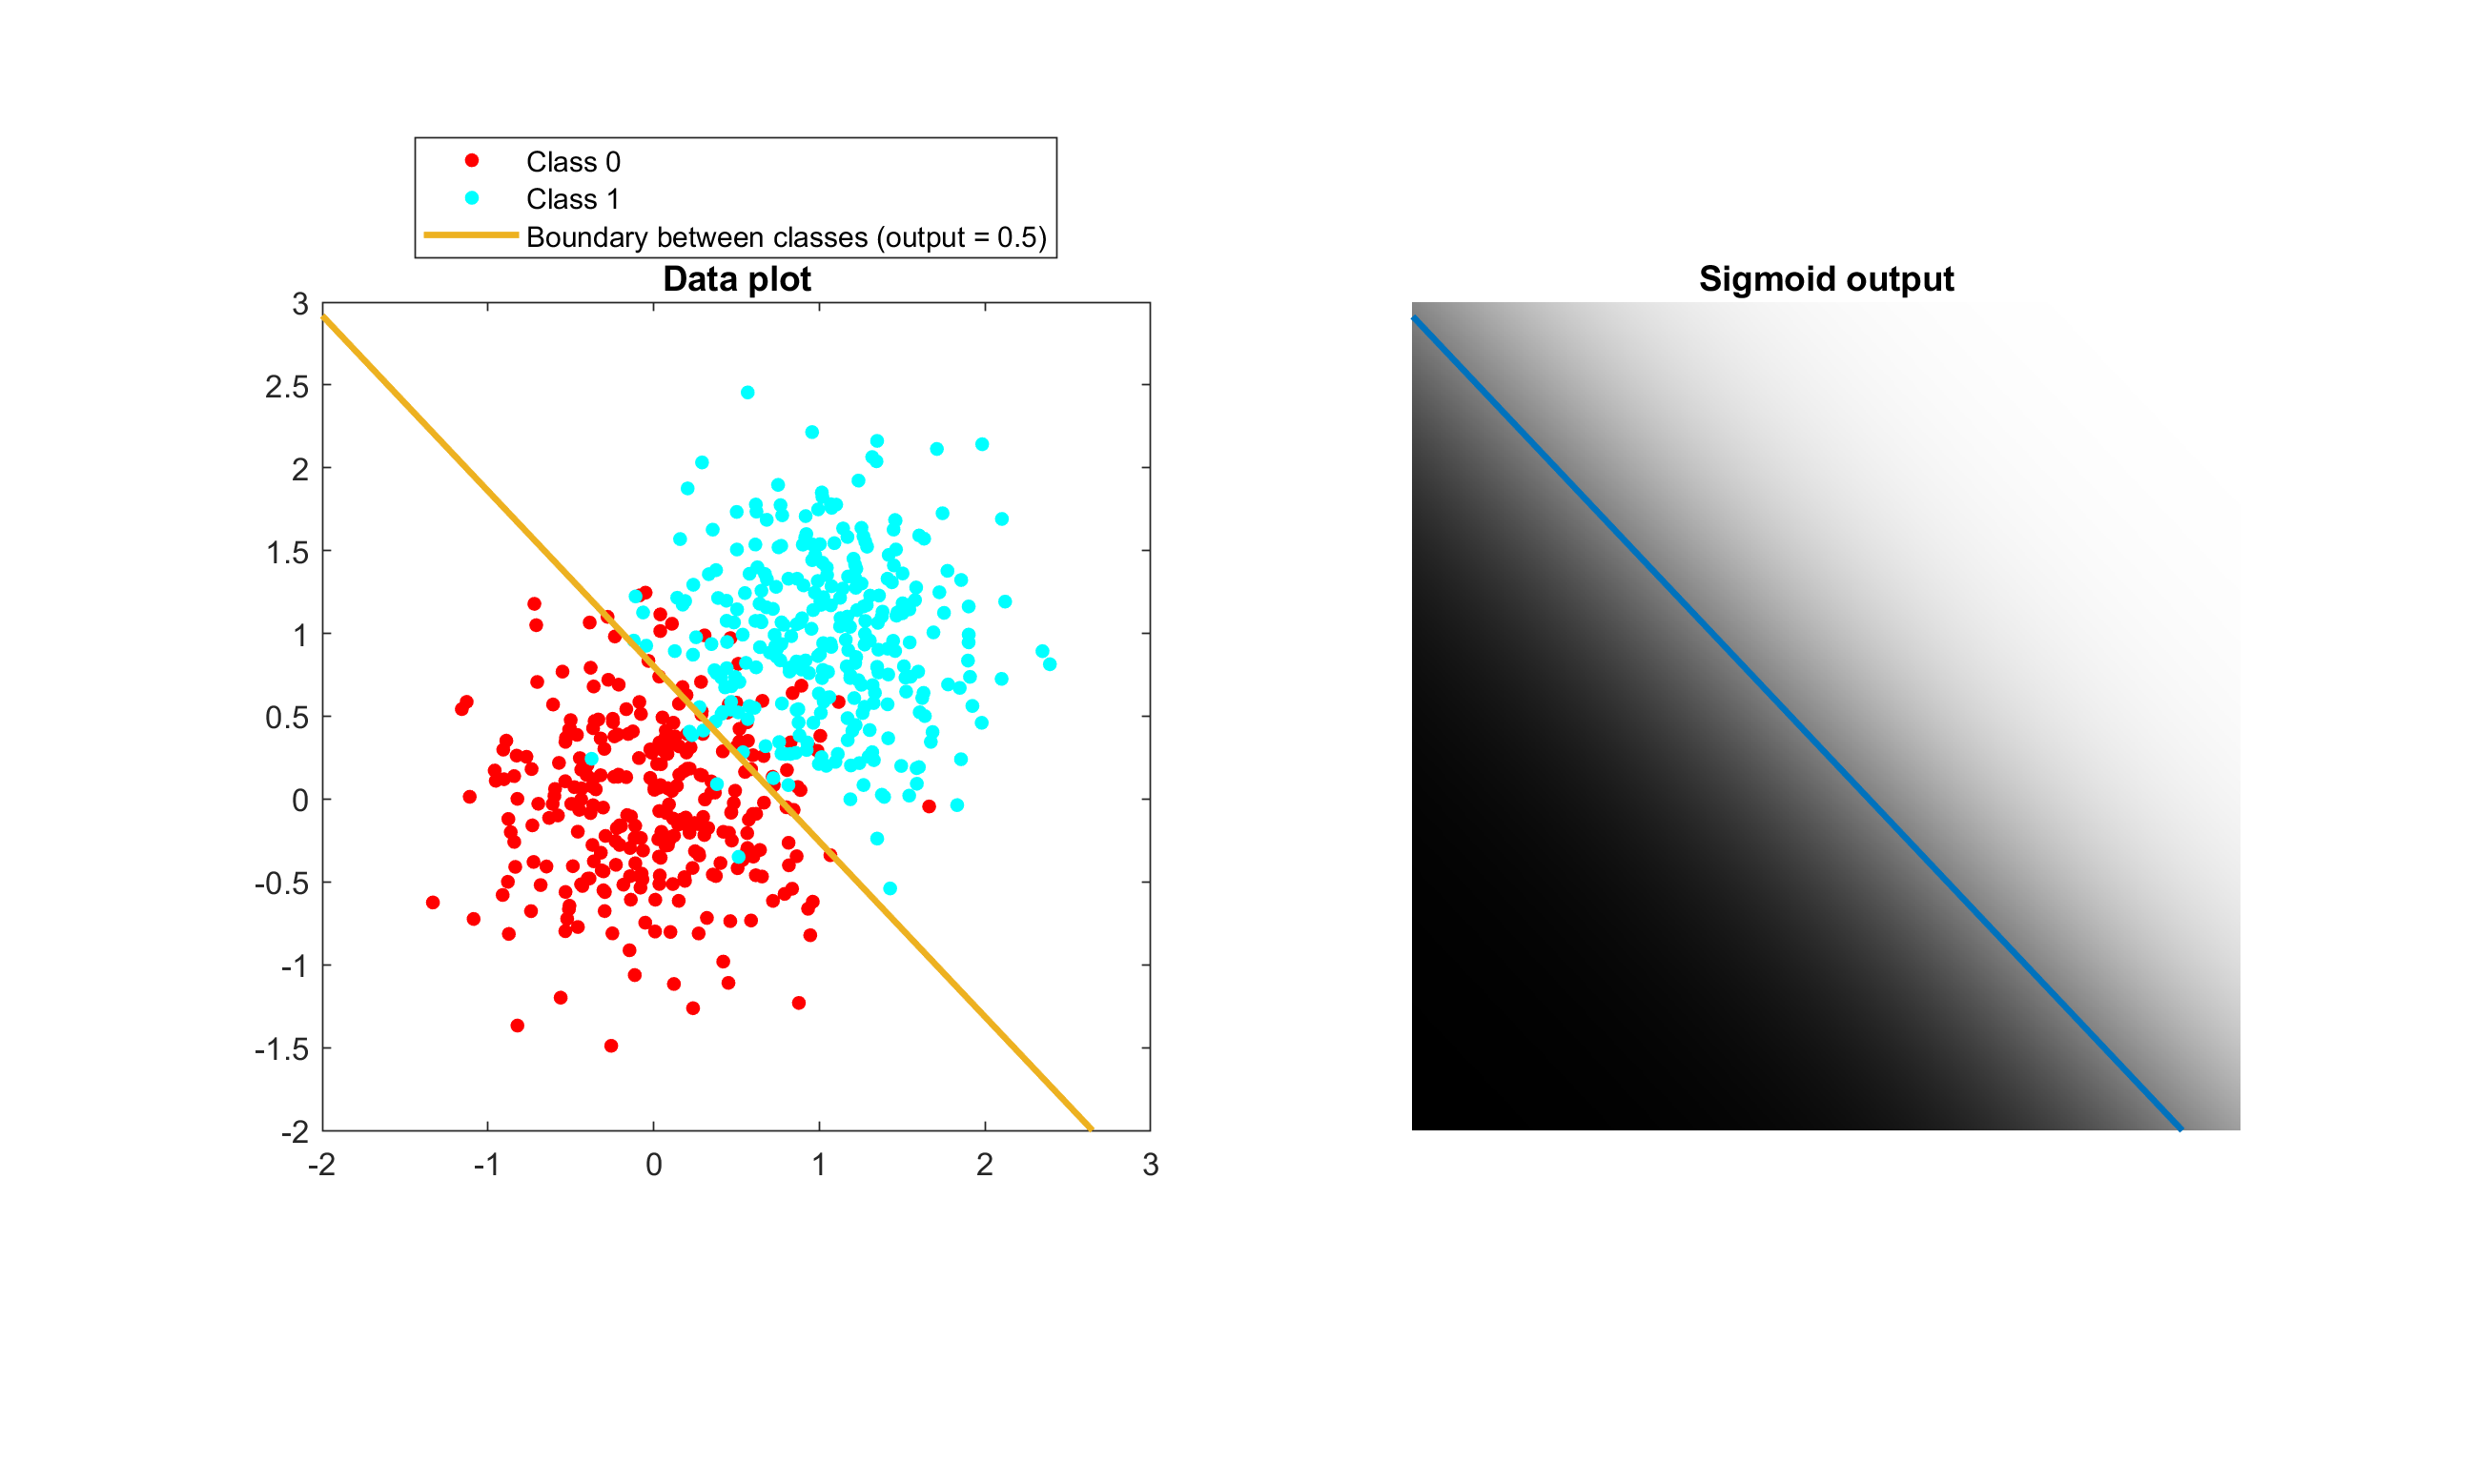
<figcaption aria-hidden="true">Logistic regression attempts to draw one
linear frontier between the classes</figcaption>
</figure>

### Logistic regression = A separating line

The take-home message from the above example is:

**Logistic regression draws one linear frontier (a “hyperplane”) in the
classification space.**

In the following episode we will see how we can combine multiple neurons
(multiple hyperplanes) into forming any classification boundary, however
complicated.

## 3.2 Matlab’s `fitglm()` function’

Logistic regression can be trained in Matlab using the function
`fitglm()`, as in the following example:

``` matlab
[X, Y] = make_data([0,0], [2,2], 0.5, 300)       % points around (0,0) and (2,2), spread=0.5, N=300
mdl = fitglm(X, Y, 'Distribution', 'binomial')   % X are the inputs, Y is the target vector, mdl is a model object
```

Let’s make some predictions with our model:

``` matlab
% Predict
mdl.predict([0,0])
mdl.predict([0,0.5])
mdl.predict([3,-1.5])
```

To which class do the previous inputs belong?

## 3.3 Matlab Classification Learner App

1.  Open the GUI tool from the toolbar:

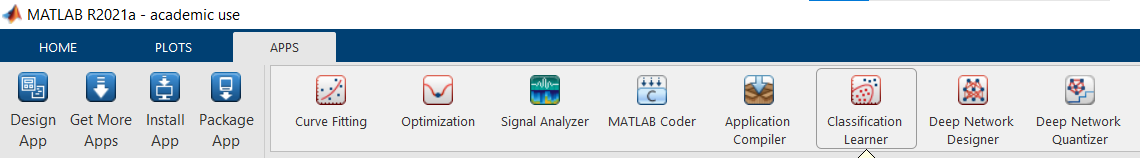

1.  Start a new session and specify the input and the output (target)
    data

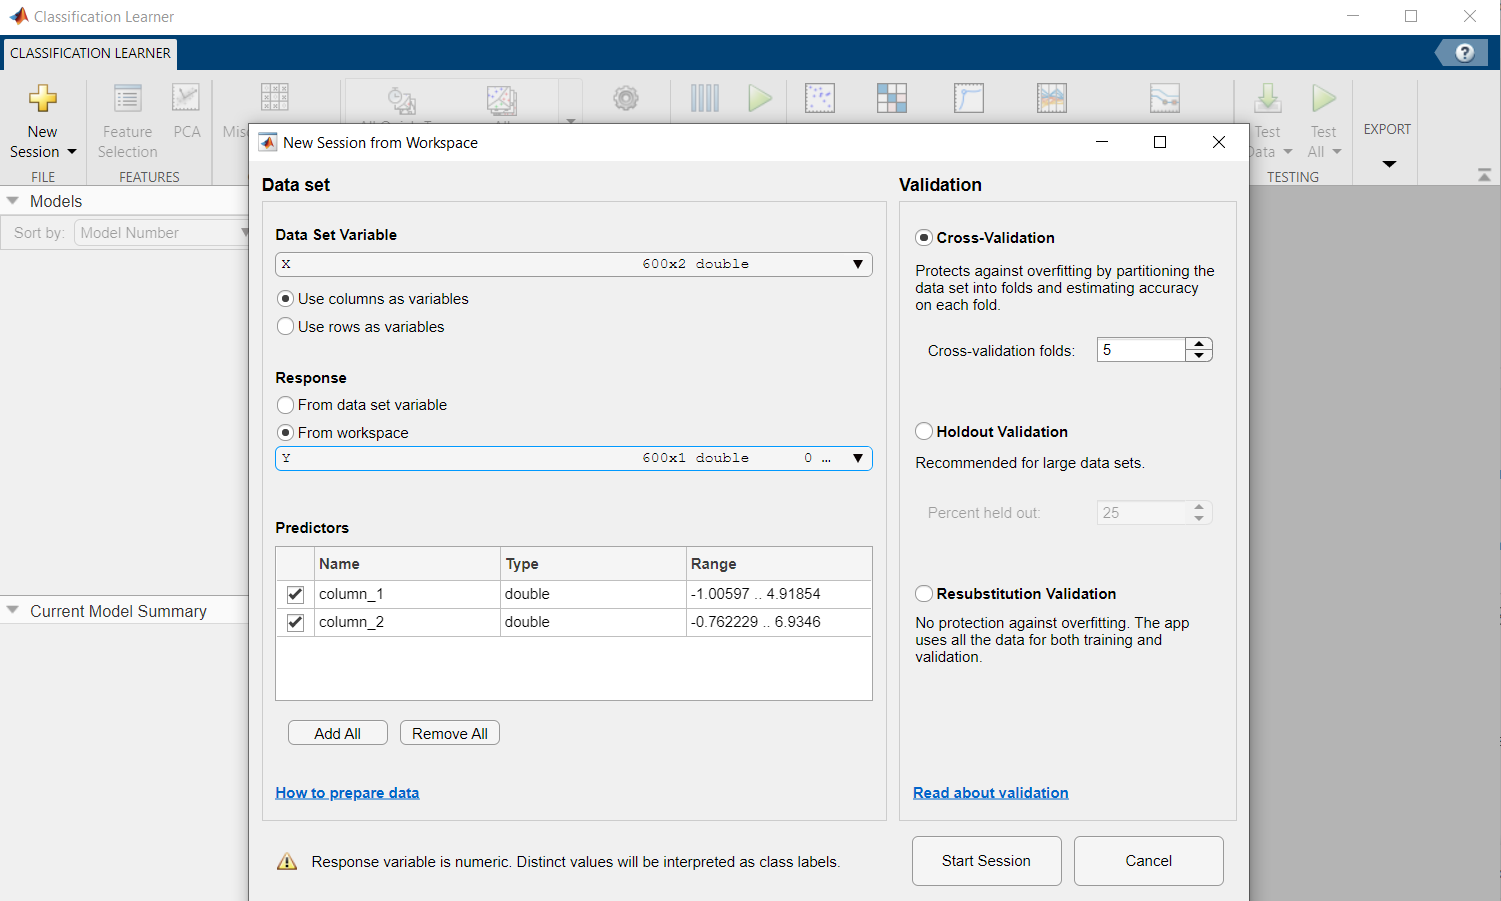

1.  Click “Start session”

2.  From the toolbar select the “Logistic Regression” algorithm

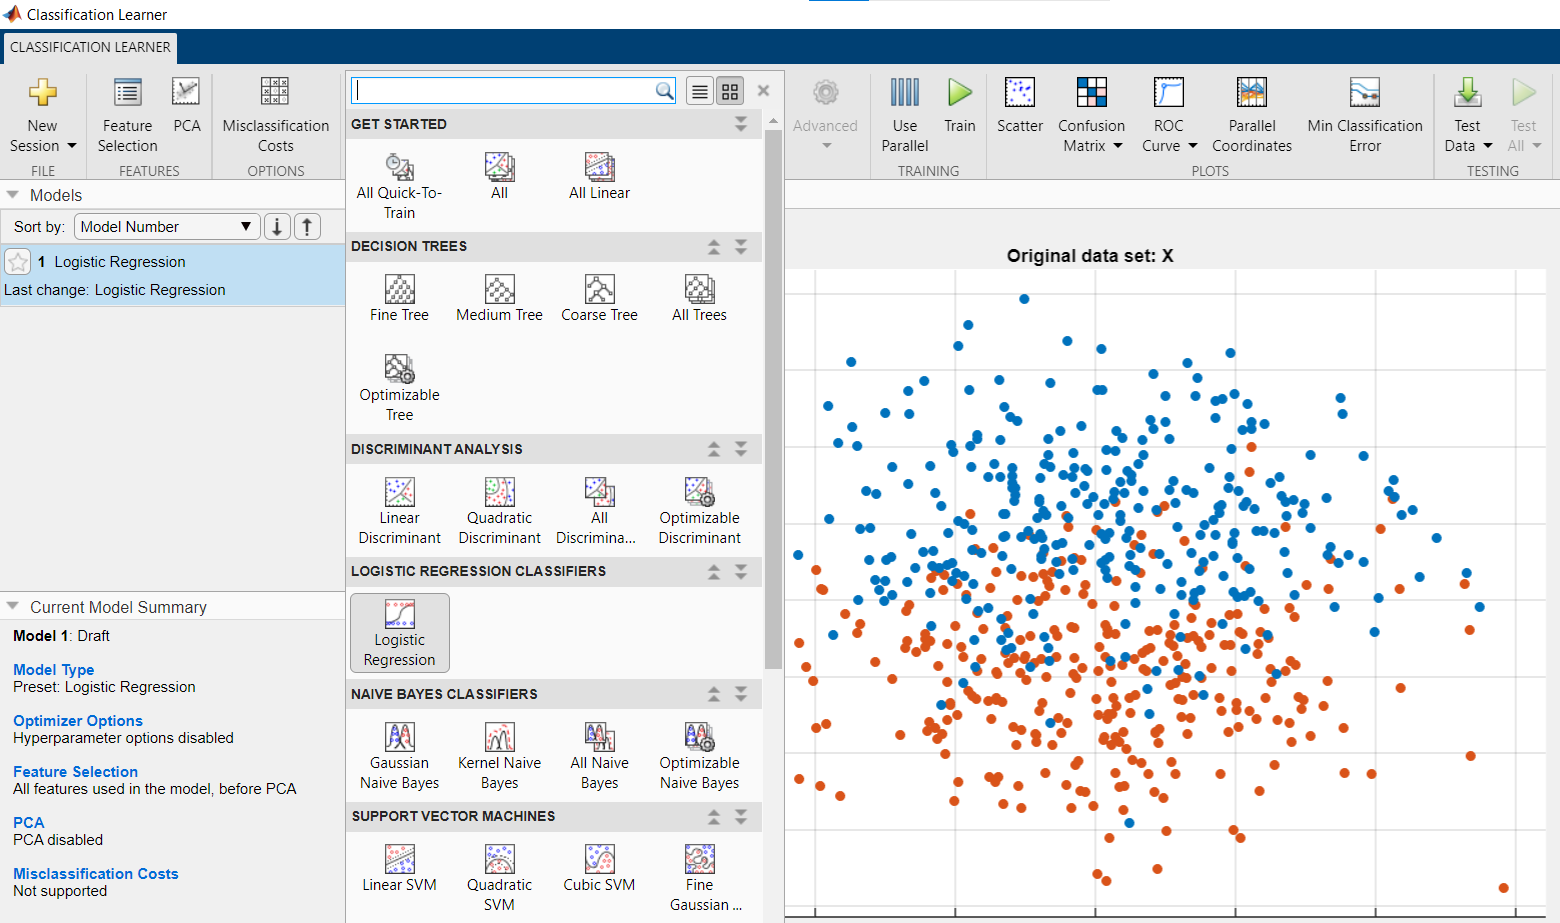

1.  Run “Train” to train the model

2.  Visualize the outputs: Scatter plot, Confusion matrix, ROC curve

3.  Export the model to Matlab’s Workspace, and start using it for
    predictions

    ``` matlab
    % Predict
    trainedModel.predictFcn([0,0])
    trainedModel.predictFcn([0,0.5])
    trainedModel.predictFcn([3,-1.5])
    ```

    You can explore the trained model parameters from the Workspace:

    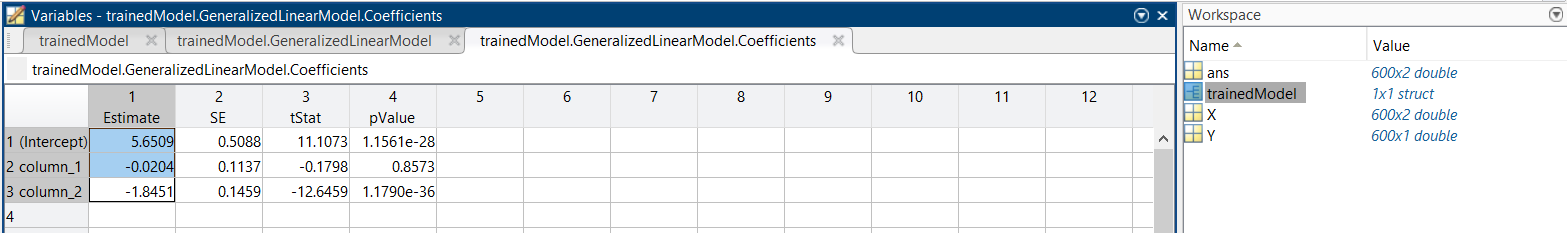

# 4. Practical work

## 4.1 Exercise 1 - Synthetic data

1.  Use the `make_data()` function to generate some data points around
    $(-1,1)$ and $(1,-1)$.

2.  Train logistic regression with `fitglm()`, as in the example above.

    1.  Predict the class of point $(0, -0.3)$
    2.  What are the values of the model’s coefficients?

3.  Train logistic regression with the Classification Learner App, on
    the same data.

    1.  Show the Confusion Matrix. How many point from Class 0 are
        mis-classified as Class 1? What is the accuracy of the model?

    2.  Predict the class of point $(0.4, 0.4)$?

## 4.2 Exercise 2 - Titanic survivors

We are using the Titanic Survivors dataset from here:
<https://www.kaggle.com/datasets/azeembootwala/titanic>

1.  Read about the dataset from here:
    <https://www.kaggle.com/datasets/azeembootwala/titanic>

2.  Load the training file `Titanic/train_data.csv`

    The first two columns are useless, the 3rd (“Survived”) indicates if
    the person survived, and the rest of the columns are various info
    about the passengers.

    Use the following code:

    ``` matlab
    traindata = readtable('Titanic/train_data.csv');
    X = traindata(:, 4:end);  % input = columns from 4th onwards
    Y = traindata(:, 3);      % output = column 3 ("survived")
    X = table2array(X);
    Y = table2array(Y);
    ```

3.  Run the Classification Learner App and train a Logistic Regression
    model on the data.

    -   What is the accuracy of the model?

4.  Import the testing data `Titanic/test_data.csv` and predict the
    survival of the those passengers.

    You can call `trainedModel.predictFcn( table )` on a full table.

    Are the predictions correct (do they match the actual “Survived”
    value)? Check for the first five persons.

## 4.3 Exercise 3 - Titanic survivors

Repeat the training in Exercise 2, but use only the “Sex”, “Age” and
“Fare” columns, not all of them.

What is the accuracy of the model in this case?

## 4.4 Exercise 4 - Spine data

We use the dataset from
<https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset>

The file is `Spine/Dataset_spine.csv`

1.  Read about the dataset and what the columns specify.

    What is the target column?

2.  Run the Classification Learner App and train a Logistic Regression
    model on the data.

    1.  What is the accuracy of the model?

    2.  How many normal conditions are classified as abnormal by the
        model?

    3.  How many normal conditions are classified as normal by the
        model?

3.  Predict the result for all the persons in the table.

# 5. Final questions / open discussion

1.  What happens if the two classes are **unbalanced** (many more inputs
    in one class compared to the other)? Do you think this is a problem?

2.  Suggest some good termination conditions for Gradient Descent
    (i.e. when should we stop the iterations)?